# Stock Prediction Project: Workflow Overview

### Utkarsh Joshi 

Project Overview and Dataset: https://www.kaggle.com/competitions/optiver-trading-at-the-close/overview

This notebook follows a structured, step-by-step approach to solving the stock prediction problem using historical and revealed data. The main stages are:

## 1. Exploratory Data Analysis (EDA)
We begin by examining the dataset to understand its structure, distribution, and any underlying patterns or anomalies. This includes:
- Inspecting data types and missing values
- Visualizing the distribution of key features like `target`
- Investigating correlations and time-based trends
- Identifying potential data leakage or signal noise

## 2. Model Exploration
Once the data is cleaned and understood, we proceed to develop predictive models. This phase includes:
- Feature engineering and selection
- Training baseline models 
- Evaluating model performance using metrics like MAE
- Tuning hyperparameters with cross-validation

## 3. Ensemble Techniques
To improve prediction accuracy and robustness, we explore ensemble strategies:
- Averaging/blending multiple model outputs
- Stacking models with a meta-learner
- Analyzing model diversity and feature importance across models

Each step is guided by data-driven decisions and iterative refinement, leading to a well-generalized final solution.

---


In [109]:
#!pip install -q gdown
#import gdown

#gdown.download("https://drive.google.com/uc?id=1y8BNS7yVGuMxOFKBqpy4h-F42W4IyNBz", "train.csv", fuzzy=True)


In [26]:
import pandas as pd

file_path = r"C:\Users\91788\Downloads\optiver-trading-at-the-close\train.csv"

# Load the dataset
df = pd.read_csv(file_path)
df.head()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 -5.519986   
2         NaN   0.999403  37956.00   1.000298   18995.00  1.0 -8.389950   
3         NaN   0.999999   2324.90   1.000214  479032.40  1.0 -4.010200   
4         NaN   0.999394  16485.54   1.000016     434.10  1.0 -7.349849   

   time_id row_id  
0        0  0_0_0  
1        0  0_0_1  
2        0  0_0_2  
3        0  0_0_3  
4        0  0_0_4

## Basic Checks

In [132]:
# Shape, missing values, types
print(df.shape)
print(df.info())
print(df.describe())

(5237980, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB
None
           stock_id       date_id  seconds_in_bucket  imbalance_size  \
count  5.

In [134]:
missing_counts = df.isnull().sum()
print("Missing values:\n", missing_counts)

Missing values:
 stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


In [136]:
df[df['wap'].isnull()].groupby('stock_id').size().sort_values(ascending=False)

stock_id
19     55
101    55
131    55
158    55
dtype: int64

In [10]:
# Step 1: Sort the DataFrame
df = df.sort_values(by=['stock_id', 'date_id', 'seconds_in_bucket'])

# Step 2: Assign a local row number per group
df['row_num'] = df.groupby(['stock_id', 'date_id']).cumcount()

In [11]:
missing = df[df['wap'].isnull()]
print(missing[['stock_id', 'date_id', 'seconds_in_bucket', 'row_num']])

         stock_id  date_id  seconds_in_bucket  row_num
4764999        19      438                  0        0
4765199        19      438                 10        1
4765399        19      438                 20        2
4765599        19      438                 30        3
4765799        19      438                 40        4
...           ...      ...                ...      ...
4225138       158      388                500       50
4225338       158      388                510       51
4225538       158      388                520       52
4225738       158      388                530       53
4225938       158      388                540       54

[220 rows x 4 columns]


In [14]:
# Save the dataframe with row_num included to a CSV
#output_path = r"C:\Users\91788\Downloads\optiver-trading-at-the-close\Missing_values.csv"
#missing.to_csv(output_path, index=False)

#output_path

In [16]:
df[df['stock_id']==19].count()

stock_id                   26455
date_id                    26455
seconds_in_bucket          26455
imbalance_size             26400
imbalance_buy_sell_flag    26455
reference_price            26400
matched_size               26400
far_price                  11749
near_price                 12000
bid_price                  26400
bid_size                   26455
ask_price                  26400
ask_size                   26455
wap                        26400
target                     26454
time_id                    26455
row_id                     26455
row_num                    26455
dtype: int64

In [103]:
print("Unique stock_ids:", df['stock_id'].nunique())
print("Unique date_ids:", df['date_id'].nunique())
print("Seconds in bucket range:", df['seconds_in_bucket'].min(), "-", df['seconds_in_bucket'].max())

Unique stock_ids: 200
Unique date_ids: 481
Seconds in bucket range: 0 - 540


In [105]:
#df['wap_was_missing'] = df['wap'].isnull().astype(int)

In [107]:
df['stock_id'].sum()

520071475

## Remove Nulls - Target (88 values) and Wap(220 Values)

In [5]:
df = df.dropna(subset=['target'])

In [7]:
df = df.dropna(subset=['wap'])

## EDA

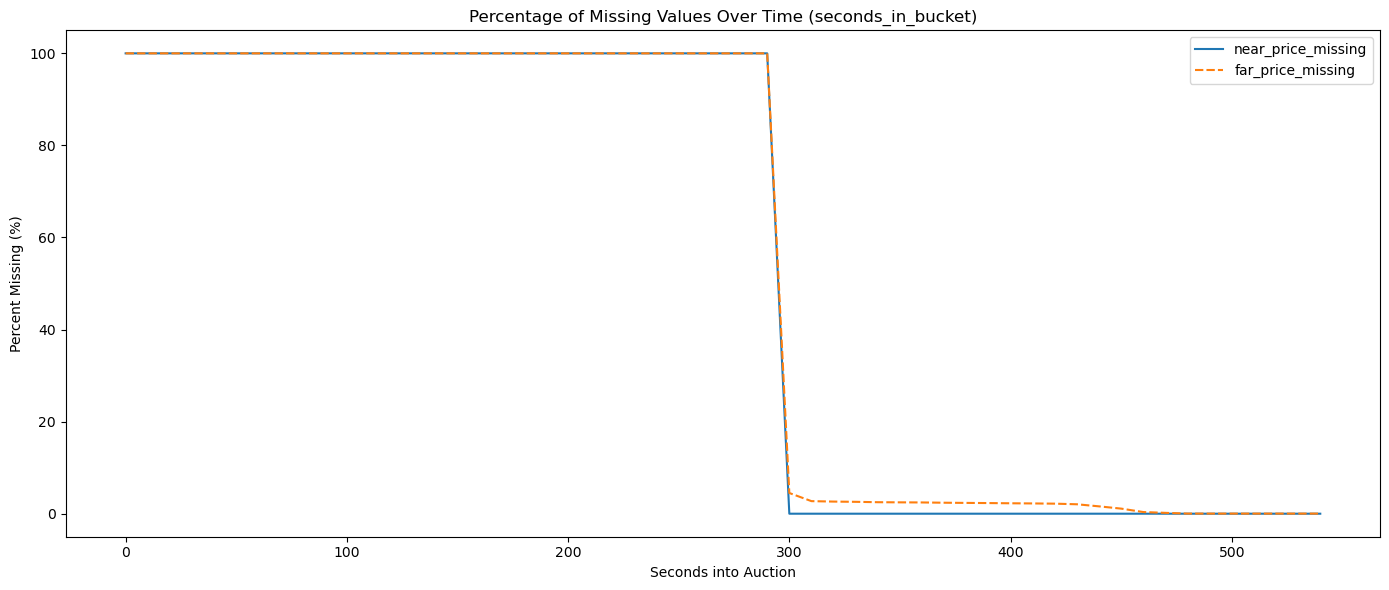

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a flag for missing values
df['near_price_missing'] = df['near_price'].isnull().astype(int)
df['far_price_missing'] = df['far_price'].isnull().astype(int)

# Group by seconds_in_bucket to see if missingness is time-driven (cyclic)
missing_by_time = df.groupby('seconds_in_bucket')[['near_price_missing', 'far_price_missing']].mean() * 100

# Plotting missingness pattern
plt.figure(figsize=(14, 6))
sns.lineplot(data=missing_by_time)
plt.title("Percentage of Missing Values Over Time (seconds_in_bucket)")
plt.xlabel("Seconds into Auction")
plt.ylabel("Percent Missing (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


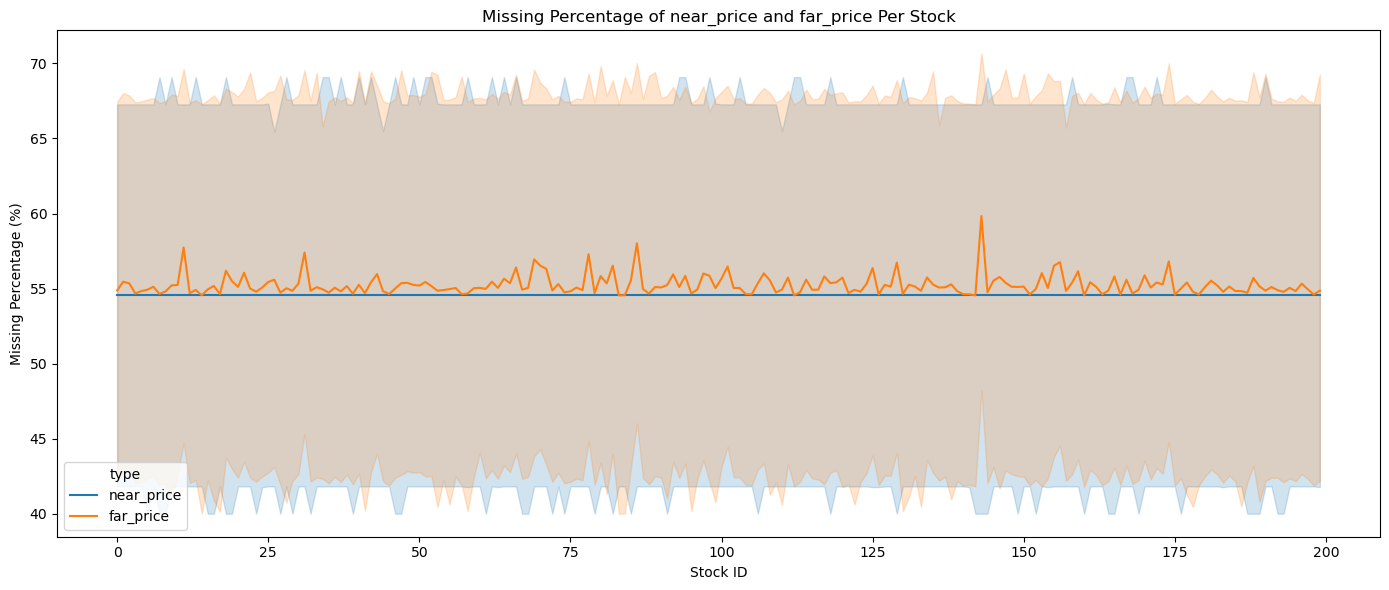

In [127]:
import pandas as pd

# Create binary flags for missing near_price and far_price
df['near_price_missing'] = df['near_price'].isnull().astype(int)
df['far_price_missing'] = df['far_price'].isnull().astype(int)

# Group by seconds_in_bucket and stock_id to examine missingness trends across time and stocks
near_missing_pct = df.groupby(['stock_id', 'seconds_in_bucket'])['near_price_missing'].mean().unstack() * 100
far_missing_pct = df.groupby(['stock_id', 'seconds_in_bucket'])['far_price_missing'].mean().unstack() * 100

# Melt near and far missing percentages to long format
near_melt = near_missing_pct.reset_index().melt(id_vars='stock_id', var_name='seconds_in_bucket', value_name='missing_pct')
near_melt['type'] = 'near_price'

far_melt = far_missing_pct.reset_index().melt(id_vars='stock_id', var_name='seconds_in_bucket', value_name='missing_pct')
far_melt['type'] = 'far_price'

# Combine both
missing_long = pd.concat([near_melt, far_melt])

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=missing_long, x='stock_id', y='missing_pct', hue='type')
plt.title("Missing Percentage of near_price and far_price Per Stock")
plt.xlabel("Stock ID")
plt.ylabel("Missing Percentage (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


In [128]:
# Calculate average missing % per stock
avg_near = near_missing_pct.mean(axis=1)
avg_far = far_missing_pct.mean(axis=1)

# Combine into a DataFrame
missing_summary = pd.DataFrame({
    'stock_id': avg_near.index,
    'near_price_missing_pct': avg_near.values,
    'far_price_missing_pct': avg_far.values
})

# Top 10 stocks with highest far_price missing %
top_10_far_missing = missing_summary.sort_values(by='far_price_missing_pct', ascending=False).head(10)

top_10_far_missing

stock_id  near_price_missing_pct  far_price_missing_pct
143       143               54.545455              59.837460
86         86               54.545455              58.019278
11         11               54.545455              57.731998
31         31               54.545455              57.403137
78         78               54.545455              57.289880
69         69               54.545455              56.945127
174       174               54.545455              56.809677
156       156               54.545455              56.756757
129       129               54.545455              56.730297
70         70               54.545455              56.529957

In [129]:
tail_10_far_missing = missing_summary.sort_values(by='far_price_missing_pct', ascending=False).tail(10)
tail_10_far_missing

stock_id  near_price_missing_pct  far_price_missing_pct
179       179               54.545455              54.609715
151       151               54.545455              54.605935
198       198               54.545455              54.605935
175       175               54.545455              54.594595
84         84               54.545455              54.560575
160       160               54.545455              54.549235
14         14               54.545455              54.549235
142       142               54.545455              54.549235
112       112               54.545455              54.549235
83         83               54.545455              54.545455

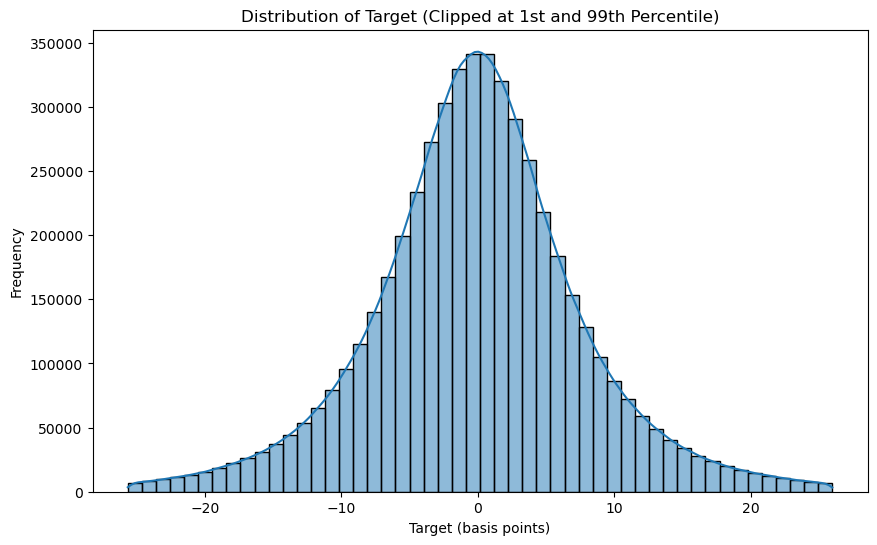

In [130]:
# Clip extreme outliers at 1st and 99th percentile
q_low, q_high = df['target'].quantile([0.01, 0.99])
filtered = df[(df['target'] >= q_low) & (df['target'] <= q_high)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered['target'], kde=True, bins=50)
plt.title("Distribution of Target (Clipped at 1st and 99th Percentile)")
plt.xlabel("Target (basis points)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

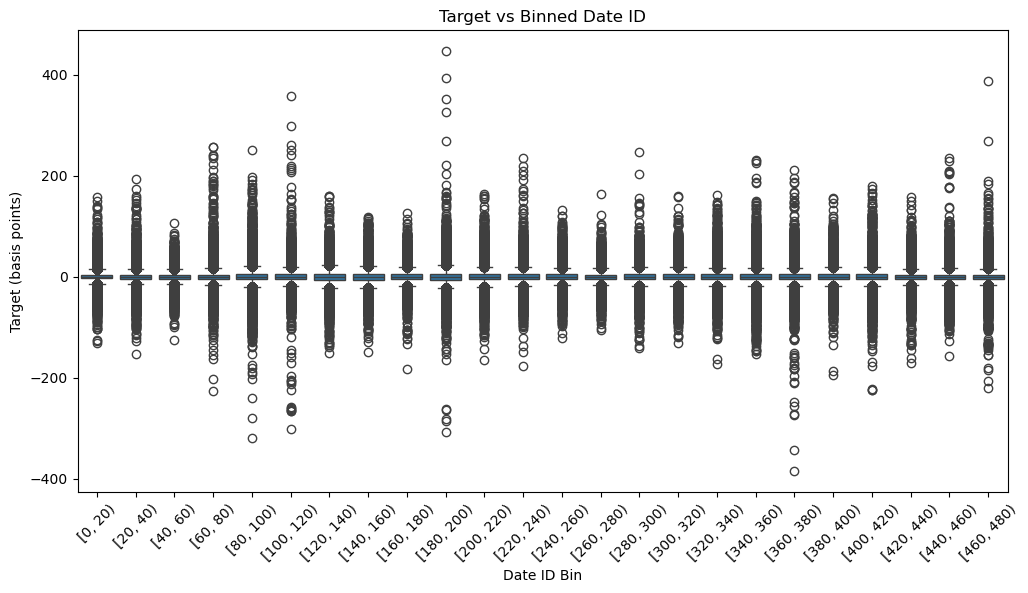

In [131]:
# Bin date_id into intervals of 20
df['date_bin'] = pd.cut(df['date_id'], bins=range(0, df['date_id'].max()+20, 20), right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='date_bin', y='target', data=df)
plt.title("Target vs Binned Date ID")
plt.xlabel("Date ID Bin")
plt.ylabel("Target (basis points)")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

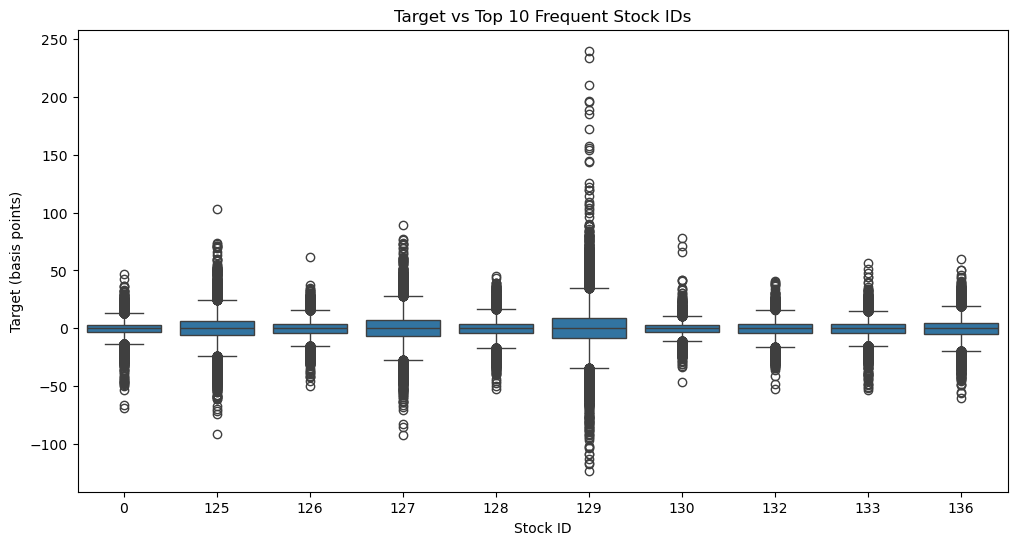

In [132]:
# Plot 4: Target vs Top 10 Frequent Stock IDs
top_stocks = df['stock_id'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='stock_id', y='target', data=df[df['stock_id'].isin(top_stocks)])
plt.title("Target vs Top 10 Frequent Stock IDs")
plt.xlabel("Stock ID")
plt.ylabel("Target (basis points)")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


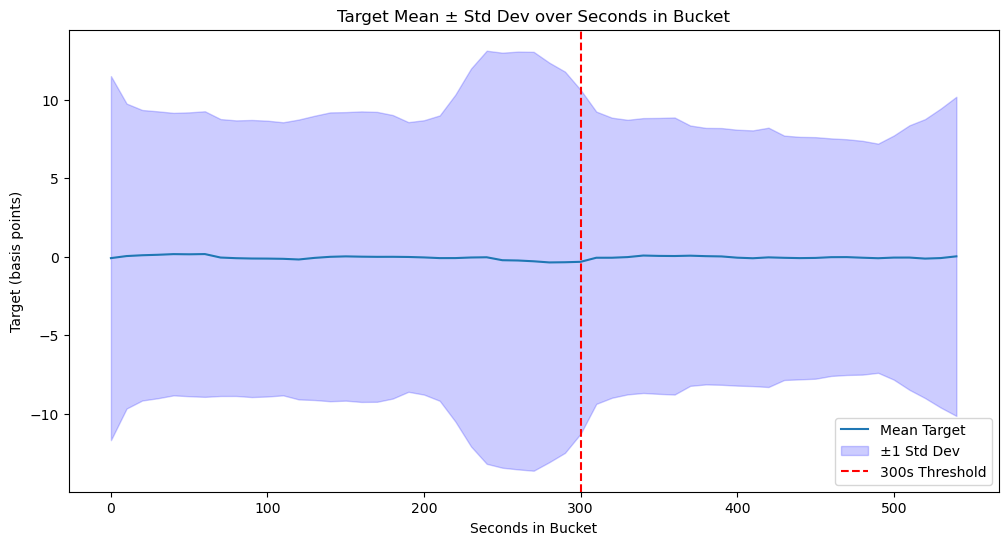

In [133]:
# Group by seconds_in_bucket and calculate mean and std of target
target_stats = df.groupby('seconds_in_bucket')['target'].agg(['mean', 'std']).reset_index()

# Plot mean ± std over time
plt.figure(figsize=(12, 6))
plt.plot(target_stats['seconds_in_bucket'], target_stats['mean'], label='Mean Target')
plt.fill_between(
    target_stats['seconds_in_bucket'],
    target_stats['mean'] - target_stats['std'],
    target_stats['mean'] + target_stats['std'],
    color='blue',
    alpha=0.2,
    label='±1 Std Dev'
)
plt.axvline(x=300, color='red', linestyle='--', label='300s Threshold')
plt.title("Target Mean ± Std Dev over Seconds in Bucket")
plt.xlabel("Seconds in Bucket")
plt.ylabel("Target (basis points)")
plt.legend()
plt.grid(False)
plt.show()

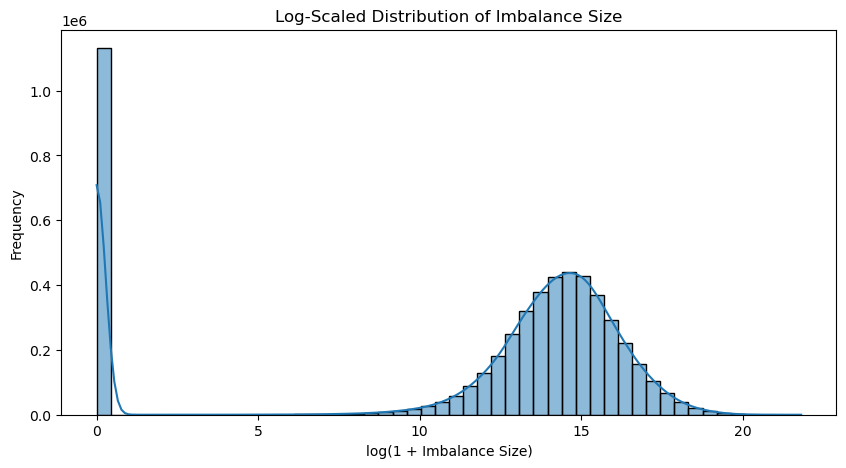

In [134]:
# Add 1 to avoid log(0)
import numpy as np
df['log_imbalance_size'] = np.log1p(df['imbalance_size'])

plt.figure(figsize=(10, 5))
sns.histplot(df['log_imbalance_size'], bins=50, kde=True)
plt.title("Log-Scaled Distribution of Imbalance Size")
plt.xlabel("log(1 + Imbalance Size)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


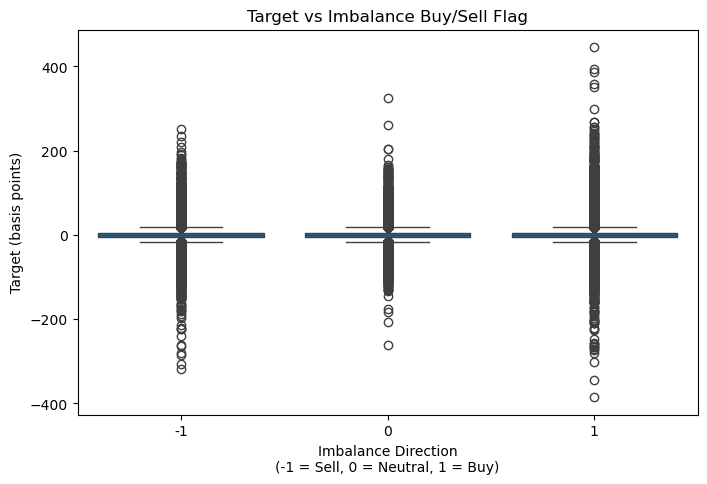

In [135]:
# Plot: Target vs Imbalance Buy/Sell Flag
plt.figure(figsize=(8, 5))
sns.boxplot(x='imbalance_buy_sell_flag', y='target', data=df)
plt.title("Target vs Imbalance Buy/Sell Flag")
plt.xlabel("Imbalance Direction\n(-1 = Sell, 0 = Neutral, 1 = Buy)")
plt.ylabel("Target (basis points)")
plt.grid(False)
plt.show()

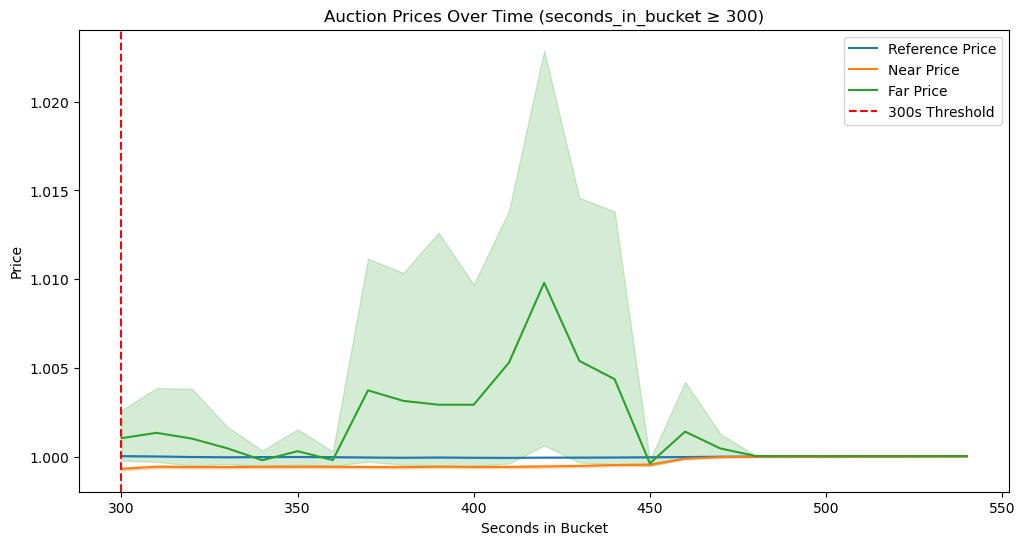

In [136]:
# Filter only rows where all auction prices are available
df_prices = df[['seconds_in_bucket', 'reference_price', 'near_price', 'far_price']].dropna()

# Plot the three auction prices over seconds_in_bucket
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_prices, x='seconds_in_bucket', y='reference_price', label='Reference Price')
sns.lineplot(data=df_prices, x='seconds_in_bucket', y='near_price', label='Near Price')
sns.lineplot(data=df_prices, x='seconds_in_bucket', y='far_price', label='Far Price')
plt.axvline(x=300, color='red', linestyle='--', label='300s Threshold')
plt.title("Auction Prices Over Time (seconds_in_bucket ≥ 300)")
plt.xlabel("Seconds in Bucket")
plt.ylabel("Price")
plt.legend()
plt.grid(False)
plt.show()

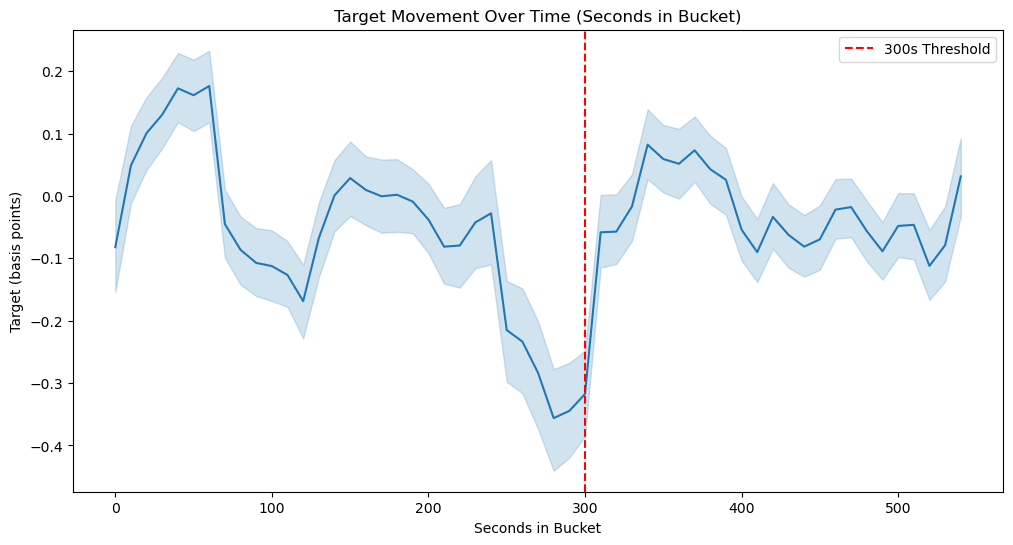

In [137]:
# Plot target over seconds_in_bucket (mean only, no aggregation to preserve time structure)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='seconds_in_bucket', y='target')
plt.axvline(x=300, color='red', linestyle='--', label='300s Threshold')
plt.title("Target Movement Over Time (Seconds in Bucket)")
plt.xlabel("Seconds in Bucket")
plt.ylabel("Target (basis points)")
plt.grid(False)
plt.legend()
plt.show()

In [138]:
df[['far_price', 'near_price', 'reference_price']].isnull().sum()

far_price          2894122
near_price         2856960
reference_price          0
dtype: int64

In [139]:
(df['far_price'] < df['near_price']).sum()

686071

In [140]:
(df['far_price'].isnull() | df['near_price'].isnull()).sum()

2894122

In [141]:
df.loc[df['far_price'] < df['near_price'], 'imbalance_buy_sell_flag'].value_counts()

imbalance_buy_sell_flag
-1    686018
 0        53
Name: count, dtype: int64

In [142]:
df[df['far_price'] < df['near_price']][['far_price', 'near_price', 'bid_price', 'ask_price', 'imbalance_buy_sell_flag']].sample(5)

far_price  near_price  bid_price  ask_price  imbalance_buy_sell_flag
2926834   0.970761    0.995523   0.996297   0.996877                       -1
1216055   0.992986    0.994556   0.998984   0.999047                       -1
1403155   0.998965    0.999299   1.000635   1.000858                       -1
613740    1.001345    1.002213   1.002213   1.003081                       -1
4840470   0.997452    0.998264   0.998781   0.999224                       -1

In [114]:
df.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                  2894122
near_price                 2856960
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

# Feature enginerring

#### For testing, I’m setting near_price and far_price to 0 for seconds_in_bucket < 300.
This is intentional: those values are systematically unavailable during the early auction window.

By doing this:

- The model can learn this behavior through associated indicator flags
- Downstream features dependent on these columns will remain numerically stable
- The model will be encouraged to infer feature relevance conditionally, based on auction phase

In [9]:
# Fill zeros only for first 300 seconds
df.loc[df['seconds_in_bucket'] < 300, 'near_price'] = 0
df.loc[df['seconds_in_bucket'] < 300, 'far_price'] = 0

df['far_price'] = df['far_price'].fillna(0)
# after fill 0 for the first 300 seconds for far price still I got 37162 nulls which are less, so I am filling those values as 0 for the first run

# (Optional) Add missingness flags
df['near_price_missing'] = (df['near_price'] == 0).astype(int)
df['far_price_missing'] = (df['far_price'] == 0).astype(int)


In [11]:
# PRICE & LIQUIDITY
df['price_spread'] = df['ask_price'] - df['bid_price']                     # liquidity tightness
df['mid_price'] = (df['ask_price'] + df['bid_price']) / 2                 # reference-like midpoint
df['spread_pct'] = df['price_spread'] / (df['wap'] + 1e-6)                # normalized spread

# SIZE & PRESSURE
df['orderbook_skew'] = df['bid_size'] / (df['bid_size'] + df['ask_size'] + 1e-6)  # buy-side pressure
df['signed_imbalance'] = df['imbalance_size'] * df['imbalance_buy_sell_flag']     # directional pressure
df['imbalance_ratio'] = df['imbalance_size'] / (df['matched_size'] + 1e-6)        # imbalance intensity

# TEMPORAL CONTEXT
df['relative_time'] = df['seconds_in_bucket'] / 540
df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)

# AUCTION VS MARKET DIVERGENCE
df['delta_wap_near'] = df['near_price'] - df['wap']
df['delta_near_far'] = df['near_price'] - df['far_price']
df['auction_deviation'] = df['near_price'] - df['reference_price']

In [13]:
df['mean_bid_size_per_day'] = df.groupby(['stock_id', 'date_id'])['bid_size'].transform('mean')
df['volatility_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('std')


In [15]:
# Daily average ask size (for supply strength)
df['mean_ask_size_day'] = df.groupby(['stock_id', 'date_id'])['ask_size'].transform('mean')

# Daily WAP mean and std (volatility and average price level)
df['mean_wap_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('mean')
df['std_wap_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('std')

# Daily imbalance pressure
df['mean_signed_imbalance_day'] = df.groupby(['stock_id', 'date_id'])['signed_imbalance'].transform('mean')

# Daily orderbook skew
df['mean_orderbook_skew_day'] = df.groupby(['stock_id', 'date_id'])['orderbook_skew'].transform('mean')


In [17]:
df['wap_change'] = df.groupby(['stock_id', 'date_id'])['wap'].transform(lambda x: x - x.iloc[0])
df['wap_pct_change'] = df['wap_change'] / (df.groupby(['stock_id', 'date_id'])['wap'].transform('first') + 1e-6)


In [19]:
df['time_bucket'] = pd.cut(
    df['seconds_in_bucket'],
    bins=[0, 180, 360, 541],   # use 541 to include 540
    labels=[0, 1, 2],
    right=False                # makes 540 fall into final bin
).cat.codes

In [21]:
stock_avg_wap = df.groupby('stock_id')['wap'].transform('mean')
df['wap_zscore_across_dates'] = (df['wap'] - stock_avg_wap) / (df.groupby('stock_id')['wap'].transform('std') + 1e-6)


In [23]:
group = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket']).groupby(['stock_id', 'date_id'])

# Short-term (30s trend)
df['rolling_std_wap_3'] = group['wap'].rolling(window=3, min_periods=1).std().reset_index(level=[0,1], drop=True)
df['rolling_mean_wap_3'] = group['wap'].rolling(window=3, min_periods=1).mean().reset_index(level=[0,1], drop=True)
df['rolling_mean_imbalance_3'] = group['signed_imbalance'].rolling(window=3, min_periods=1).mean().reset_index(level=[0,1], drop=True)


In [24]:
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
group = df.groupby(['stock_id', 'date_id'])

df['rolling_std_far_price_10'] = group['far_price'].rolling(window=10, min_periods=1).std().reset_index(level=[0,1], drop=True)


In [25]:
df['far_minus_reference'] = df['far_price'] - df['reference_price']
df['far_pct_dev'] = df['far_minus_reference'] / (df['reference_price'] + 1e-6)


In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = df.fillna(0)

# Step 1: Sort the DataFrame by stock, date, and time
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])

# Step 2: Define features to include in model
feature_cols = [
    'wap', 'price_spread', 'mid_price', 'spread_pct',
    'orderbook_skew', 'signed_imbalance', 'imbalance_ratio',
    'relative_time', 'is_late_auction',
    'delta_wap_near', 'delta_near_far', 'auction_deviation',
    'mean_bid_size_per_day', 'volatility_day', 'mean_ask_size_day',
    'mean_wap_day', 'std_wap_day', 'mean_signed_imbalance_day',
    'mean_orderbook_skew_day', 'wap_change', 'wap_pct_change',
    'time_bucket', 'rolling_std_wap_5', 'rolling_mean_wap_5',
    'rolling_mean_imbalance_5', 'rolling_mean_spread_5',
    'rolling_std_far_price_5', 'far_minus_reference', 'far_pct_dev'
]

# Sanitize feature list before normalization
feature_cols = [col for col in feature_cols if col in df.columns]

# Now normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


# Step 4: Group and reshape features and targets for RNN input
session_features = df.groupby(['stock_id', 'date_id'])[feature_cols].apply(lambda x: x.values).tolist()
session_targets = df.groupby(['stock_id', 'date_id'])['target'].apply(lambda x: x.values).tolist()

# Step 5: Convert to NumPy arrays
X = np.array(session_features)   # shape: (num_sessions, 541, n_features)
y = np.array(session_targets)    # shape: (num_sessions, 541)

# Optional: Print shapes to confirm
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (95232, 55, 24)
y shape: (95232, 55)


In [31]:
import numpy as np
import pandas as pd

# 1. Define your session-level DataFrame from the main df
session_df = df[['stock_id', 'date_id']].drop_duplicates().reset_index(drop=True)

# 2. Create time-based train/test split
unique_dates = sorted(df['date_id'].unique())
cutoff = int(len(unique_dates) * 0.8)
train_dates = unique_dates[:cutoff]
test_dates = unique_dates[cutoff:]

# 3. Create boolean mask for training vs test sessions
mask = session_df['date_id'].isin(train_dates)

# 4. Apply mask to X and y
X_train = X[mask.values]
X_test = X[~mask.values]

# 5. Sequence-to-One: extract only the final target value at each session
y_train = y[mask.values][:, -1]
y_test = y[~mask.values][:, -1]

# 6. Print shapes to confirm
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (75834, 55, 24)
y_train: (75834,)
X_test: (19398, 55, 24)
y_test: (19398,)


75,834 training sessions

19,398 testing sessions

55 time steps per session (from 0s to 540s in 10s intervals)

24 features per time step

## Base model results with no optimization - GRU

C:\Users\91788\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 6.9454 - val_loss: 6.0094
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 6.8601 - val_loss: 5.9737
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 6.8054 - val_loss: 5.9501
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 6.8389 - val_loss: 5.9294
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 6.7512 - val_loss: 5.8900
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Final Train MAE: 6.7356 | RMSE: 10.0175
Final Test  MAE: 5.8900 | RMSE: 9.4054

Epoch-wise MAE:
Epoch 1: Train MAE = 6.9113, Val MAE = 6.0094
Epoch 2: Train MAE = 6.8553, Val MAE = 5.9737
Epoch 3: Train MAE = 6.8142, Val MAE = 5.9501
Epoch 4: Train MAE = 6.7850, Val MAE = 5.9294
Epoch 5: Train MAE = 6.7560, Val MAE = 5.8900


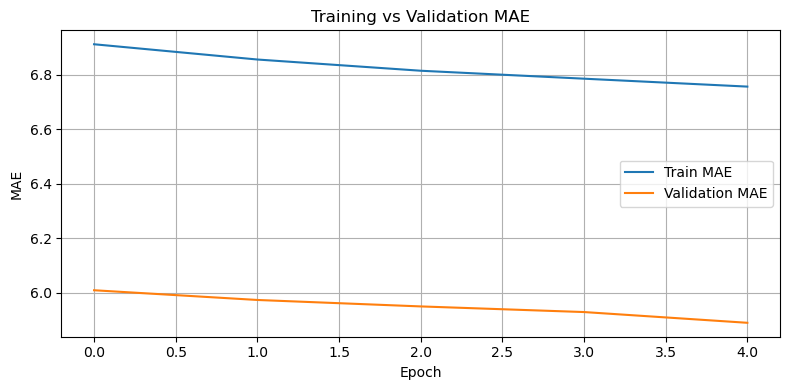

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import tqdm

# 1. Define the GRU model
model = Sequential([
    GRU(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# 2. Compile the model with MAE
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# 3. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=256,
    verbose=1
)

# 4. Final evaluation on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nFinal Train MAE: {train_mae:.4f} | RMSE: {train_rmse:.4f}")
print(f"Final Test  MAE: {test_mae:.4f} | RMSE: {test_rmse:.4f}")

# 5. Print epoch-wise MAE
print("\nEpoch-wise MAE:")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: Train MAE = {history.history['loss'][i]:.4f}, "
          f"Val MAE = {history.history['val_loss'][i]:.4f}")

# 6. Plot training vs validation MAE
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Key Takeaways

- The model is learning effectively — both train and validation MAE are decreasing.
- No signs of overfitting in the first 5 epochs.
- Current setup is a strong baseline for auction target prediction.

## Optimized version with more depth and increased epchos - GRU

C:\Users\91788\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step - loss: 6.9591 - val_loss: 5.9886 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - loss: 6.8456 - val_loss: 5.9487 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.7941 - val_loss: 5.8892 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.7314 - val_loss: 5.8499 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.6740 - val_loss: 5.8989 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.6962 - val_loss: 5.8376 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - loss: 6.6483 - val_loss: 5.8342 - learning_rate: 0.0010
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - loss: 6.6323 - val_loss: 5.9185 - learning_rate: 0.0010
Epoch 9/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - loss: 6.6238 - val_loss: 5.8599 - learn

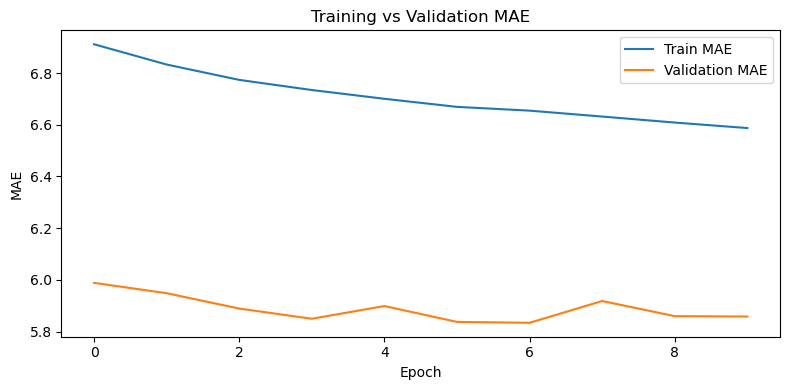

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Define model
model = Sequential([
    GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile with MAE loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nTrain RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f}")
print(f"Test  RMSE: {test_rmse:.4f} | MAE: {test_mae:.4f}")

# Plot training vs validation loss (MAE)
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

From GRU, We did find reasonable geralized results but the problem is we are using a sequence based approach 55 steps per session

In [42]:
df['time_bucket_new'] = pd.cut(
    df['seconds_in_bucket'],
    bins=[0, 300, 480, 540],   
    labels=[0, 1, 2],
    right=False                
).cat.codes

In [51]:
import numpy as np

# Collapse the sequence using mean, std, and last-timestep
X_train_flat = np.concatenate([
    X_train.mean(axis=1),
    X_train.std(axis=1),
    X_train[:, -1, :]
], axis=1)

X_test_flat = np.concatenate([
    X_test.mean(axis=1),
    X_test.std(axis=1),
    X_test[:, -1, :]
], axis=1)

print("X_train_flat:", X_train_flat.shape)
print("X_test_flat:", X_test_flat.shape)


X_train_flat: (75834, 72)
X_test_flat: (19398, 72)


### Transformers

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 6.9894 - val_loss: 6.1181 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - loss: 6.9108 - val_loss: 6.1071 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8935 - val_loss: 6.0777 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 6.9548 - val_loss: 6.0479 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 6.9273 - val_loss: 6.0139 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - loss: 6.9316 - val_loss: 6.0500 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8733 - val_loss: 6.0079 - learning_rate: 0.0010
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8288 - val_loss: 6.0145 - learning_rate: 0.0010
Epoch 9/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8288 - val_loss: 5.9922 - learning_rate:

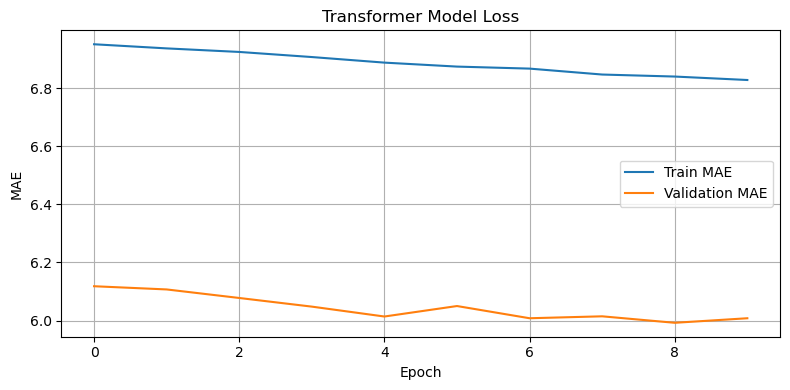

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, GlobalAveragePooling1D, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
seq_len = X_train.shape[1]
feature_dim = X_train.shape[2]
num_heads = 4
ff_dim = 128
drop_rate = 0.2

# Transformer block
def transformer_block(x):
    # Multi-head self attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=feature_dim)(x, x)
    attn_output = Dropout(drop_rate)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([x, attn_output]))
    
    # Feedforward
    ffn_output = Dense(ff_dim, activation='relu')(out1)
    ffn_output = Dense(feature_dim)(ffn_output)
    ffn_output = Dropout(drop_rate)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# Model definition
inputs = Input(shape=(seq_len, feature_dim))
x = transformer_block(inputs)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mae')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f} | MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f} | MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")

# Plot MAE
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Transformer Model Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Treebased model- Best Hyperparameters

In [53]:
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


In [71]:
# from sklearn.model_selection import GridSearchCV
# import lightgbm as lgb

# lgb_params = {
#     'num_leaves': [15, 31],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [5, 10],
#     'n_estimators': [100, 200]
# }

# lgb_model = lgb.LGBMRegressor(objective='mae', random_state=42)
# lgb_search = GridSearchCV(lgb_model, lgb_params, scoring=mae_scorer, cv=3, verbose=1)
# lgb_search.fit(X_train_flat, y_train)

# print(" Best LightGBM Params:", lgb_search.best_params_)

In [57]:
from catboost import CatBoostRegressor

cat_params = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'iterations': [100, 200]
}

cat_model = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
cat_search = GridSearchCV(cat_model, cat_params, scoring=mae_scorer, cv=3, verbose=1)
cat_search.fit(X_train_flat, y_train)

print("Best CatBoost Params:", cat_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best CatBoost Params: {'depth': 6, 'iterations': 200, 'learning_rate': 0.05}


### Tree Based Model - CatBoostRegressor | Not working that well

In [73]:
df_early = df[df['seconds_in_bucket'] < 300].copy()
df_late = df[df['seconds_in_bucket'] >= 300].copy()

In [75]:
features = [col for col in df.columns if col not in ['row_id', 'target', 'stock_id', 'date_id', 'time_id']]

In [77]:
from catboost import CatBoostRegressor

cat_early = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.05, loss_function='MAE', verbose=0)
cat_early.fit(df_early[features], df_early['target'])

cat_late = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.05, loss_function='MAE', verbose=0)
cat_late.fit(df_late[features], df_late['target'])

## Treebased Model - LightGBM

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import joblib
import os

# Load data (assumes you have already loaded 'df')
# For demonstration, placeholder is added.
# Replace this with actual loading if needed.

# Step 1: Basic preprocessing
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
df = df.fillna(0)

# Step 2: Feature engineering (assumes you've already added these features)
# Placeholder: Add your engineered features here if not already in df

# Step 3: Pre/Post 300s Split
df_early = df[df['is_late_auction'] == 0].copy()
df_late = df[df['is_late_auction'] == 1].copy()

# Drop far and near prices for early part
drop_cols = ['near_price', 'far_price', 'delta_wap_near', 'delta_near_far', 'auction_deviation']
df_early.drop(columns=[col for col in drop_cols if col in df_early.columns], inplace=True)

# Step 4: Prepare 2D arrays
features_early = [col for col in df_early.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]
features_late = [col for col in df_late.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7688
[LightGBM] [Info] Number of data points in the train set: 2275020, number of used features: 33
[LightGBM] [Info] Start training from score -0.090003
Training until validation scores don't improve for 10 rounds
[50]	valid_0's l1: 6.00975
[100]	valid_0's l1: 5.87522
[150]	valid_0's l1: 5.81807
[200]	valid_0's l1: 5.78852
Did not meet early stopping. Best iteration is:
[199]	valid_0's l1: 5.78762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9220
[LightGBM] [Info] Number of data points in the train set: 1895850, number of used f

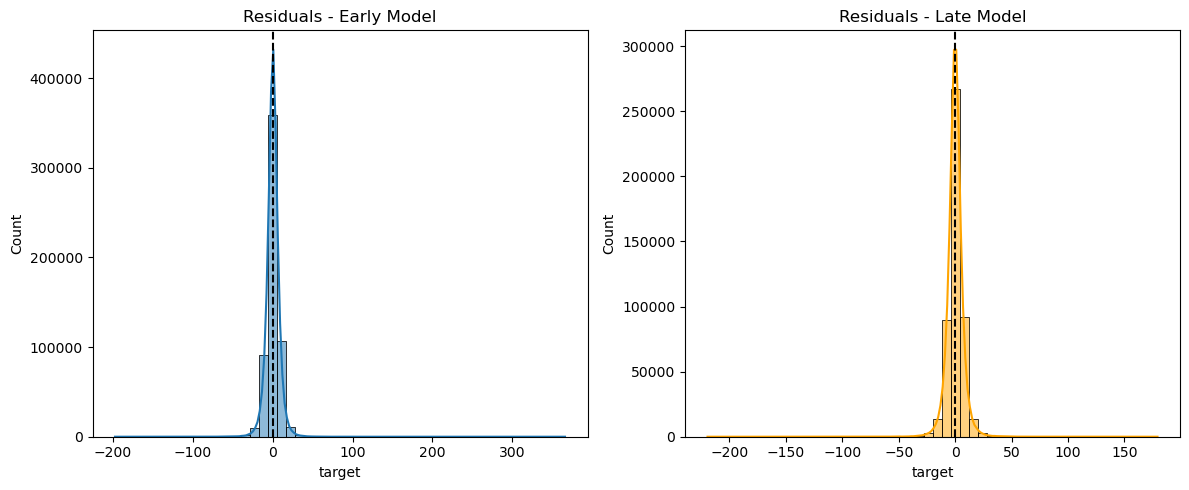

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocessing ---
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
df = df.fillna(0)
df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)
df_early = df[df['is_late_auction'] == 0].copy()
df_late = df[df['is_late_auction'] == 1].copy()

drop_cols = ['near_price', 'far_price', 'delta_wap_near', 'delta_near_far', 'auction_deviation']
df_early.drop(columns=[col for col in drop_cols if col in df_early.columns], inplace=True)

features_early = [col for col in df_early.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]
features_late = [col for col in df_late.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]

X_early = df_early[features_early]
y_early = df_early['target']
X_late = df_late[features_late]
y_late = df_late['target']

scaler_early = StandardScaler()
X_early_scaled = scaler_early.fit_transform(X_early)
scaler_late = StandardScaler()
X_late_scaled = scaler_late.fit_transform(X_late)

unique_dates = sorted(df['date_id'].unique())
cutoff = int(len(unique_dates) * 0.8)
train_dates = unique_dates[:cutoff]
test_dates = unique_dates[cutoff:]

early_mask_train = df_early['date_id'].isin(train_dates)
early_mask_test = df_early['date_id'].isin(test_dates)
X_train_early = X_early_scaled[early_mask_train.values]
X_test_early = X_early_scaled[early_mask_test.values]
y_train_early = y_early[early_mask_train.values]
y_test_early = y_early[early_mask_test.values]

late_mask_train = df_late['date_id'].isin(train_dates)
late_mask_test = df_late['date_id'].isin(test_dates)
X_train_late = X_late_scaled[late_mask_train.values]
X_test_late = X_late_scaled[late_mask_test.values]
y_train_late = y_late[late_mask_train.values]
y_test_late = y_late[late_mask_test.values]

# --- Training ---
model_early = lgb.LGBMRegressor(objective='mae', learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=31, random_state=42)
model_early.fit(
    X_train_early, y_train_early,
    eval_set=[(X_test_early, y_test_early)],
    eval_metric='mae',
    callbacks=[log_evaluation(50), early_stopping(10)]
)

model_late = lgb.LGBMRegressor(objective='mae', learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=31, random_state=42)
model_late.fit(
    X_train_late, y_train_late,
    eval_set=[(X_test_late, y_test_late)],
    eval_metric='mae',
    callbacks=[log_evaluation(50), early_stopping(10)]
)

# --- Evaluation ---
y_train_pred_early = model_early.predict(X_train_early)
y_test_pred_early = model_early.predict(X_test_early)
y_train_pred_late = model_late.predict(X_train_late)
y_test_pred_late = model_late.predict(X_test_late)

print(f"Early - Train MAE: {mean_absolute_error(y_train_early, y_train_pred_early):.4f} | Test MAE: {mean_absolute_error(y_test_early, y_test_pred_early):.4f}")
print(f"Late  - Train MAE: {mean_absolute_error(y_train_late, y_train_pred_late):.4f} | Test MAE: {mean_absolute_error(y_test_late, y_test_pred_late):.4f}")

# --- Residual Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_test_early - y_test_pred_early, bins=50, kde=True)
plt.axvline(0, color='black', linestyle='--')
plt.title("Residuals - Early Model")

plt.subplot(1, 2, 2)
sns.histplot(y_test_late - y_test_pred_late, bins=50, kde=True, color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.title("Residuals - Late Model")

plt.tight_layout()
plt.show()


In [108]:
# Aggregate to session level using weighted average based on seconds
df_early['preds'] = model_early.predict(X_early_scaled)
df_late['preds'] = model_late.predict(X_late_scaled)

# Combine both sets
df_combined = pd.concat([df_early, df_late], axis=0)

# Reduce to 1 prediction per session
tree_session_preds = df_combined.groupby(['stock_id', 'date_id'])['preds'].mean().reset_index(name='tree_pred')

# Kaggle Submission
## Final Data Preparation - For Ensemble set up post Exploration

# Ensemble set up 0.5 * LightGBM + 0.3 GRU + 0.2 Transformers

### Data preprocessing for GRU and Transformer

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sort and define feature columns
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
feature_cols_gru = [
    'wap', 'price_spread', 'mid_price', 'spread_pct',
    'orderbook_skew', 'signed_imbalance', 'imbalance_ratio',
    'relative_time', 'is_late_auction',
    'delta_wap_near', 'delta_near_far', 'auction_deviation',
    'mean_bid_size_per_day', 'volatility_day', 'mean_ask_size_day',
    'mean_wap_day', 'std_wap_day', 'mean_signed_imbalance_day',
    'mean_orderbook_skew_day', 'wap_change', 'wap_pct_change',
    'time_bucket', 'rolling_std_wap_3', 'rolling_mean_wap_3',
    'rolling_mean_imbalance_3', 'rolling_std_far_price_10',
    'far_minus_reference', 'far_pct_dev'
]
feature_cols_gru = [col for col in feature_cols_gru if col in df.columns]

# Normalize features
scaler_gru = StandardScaler()
df[feature_cols_gru] = scaler_gru.fit_transform(df[feature_cols_gru])

# Convert to sequence format
session_features = df.groupby(['stock_id', 'date_id'])[feature_cols_gru].apply(lambda x: x.values).tolist()
session_targets = df.groupby(['stock_id', 'date_id'])['target'].apply(lambda x: x.values).tolist()

X_gru = np.array(session_features)
y_gru = np.array(session_targets)

# Create session-level date split
session_df = df[['stock_id', 'date_id']].drop_duplicates().reset_index(drop=True)
unique_dates = sorted(df['date_id'].unique())
cutoff = int(len(unique_dates) * 0.8)
train_dates = unique_dates[:cutoff]
test_dates = unique_dates[cutoff:]
mask = session_df['date_id'].isin(train_dates)

# Sequence-to-one targets (use final step)
X_train_gru = X_gru[mask.values]
X_test_gru = X_gru[~mask.values]
y_train_gru = y_gru[mask.values][:, -1]
y_test_gru = y_gru[~mask.values][:, -1]


X_train_transformer = X_train_gru
X_test_transformer = X_test_gru
y_train_transformer = y_train_gru
y_test_transformer = y_test_gru

### Data preprocessing for LightGBM

In [30]:
# Mark early vs late auction
df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)
df_early = df[df['is_late_auction'] == 0].copy()
df_late = df[df['is_late_auction'] == 1].copy()

# Drop near/far price for early model
drop_cols = ['near_price', 'far_price', 'delta_wap_near', 'delta_near_far', 'auction_deviation']
df_early.drop(columns=[col for col in drop_cols if col in df_early.columns], inplace=True)

# Feature columns
features_early = [col for col in df_early.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]
features_late = [col for col in df_late.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]

# Inputs and targets
X_early = df_early[features_early]
y_early = df_early['target']
X_late = df_late[features_late]
y_late = df_late['target']

# Normalize
from sklearn.preprocessing import StandardScaler
scaler_early = StandardScaler()
X_early_scaled = scaler_early.fit_transform(X_early)
scaler_late = StandardScaler()
X_late_scaled = scaler_late.fit_transform(X_late)

# Train/test split
early_mask_train = df_early['date_id'].isin(train_dates)
early_mask_test = df_early['date_id'].isin(test_dates)
late_mask_train = df_late['date_id'].isin(train_dates)
late_mask_test = df_late['date_id'].isin(test_dates)

X_train_early = X_early_scaled[early_mask_train.values]
X_test_early = X_early_scaled[early_mask_test.values]
y_train_early = y_early[early_mask_train.values]
y_test_early = y_early[early_mask_test.values]

X_train_late = X_late_scaled[late_mask_train.values]
X_test_late = X_late_scaled[late_mask_test.values]
y_train_late = y_late[late_mask_train.values]
y_test_late = y_late[late_mask_test.values]

## Models

In [32]:
def run_gru_model(X_train, y_train, X_test, y_test):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import GRU, Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    model = Sequential([
        GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        GRU(64),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
    model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=10, batch_size=256, callbacks=callbacks, verbose=1)
    
    y_pred = model.predict(X_test)
    return model, y_pred.squeeze()

In [34]:
def run_transformer_model(X_train, y_train, X_test, y_test):
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, GlobalAveragePooling1D, MultiHeadAttention, Add
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

    seq_len = X_train.shape[1]
    feature_dim = X_train.shape[2]
    num_heads = 4
    ff_dim = 128
    drop_rate = 0.2

    def transformer_block(x):
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=feature_dim)(x, x)
        attn_output = Dropout(drop_rate)(attn_output)
        out1 = LayerNormalization(epsilon=1e-6)(Add()([x, attn_output]))
        ffn_output = Dense(ff_dim, activation='relu')(out1)
        ffn_output = Dense(feature_dim)(ffn_output)
        ffn_output = Dropout(drop_rate)(ffn_output)
        return LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))

    inputs = Input(shape=(seq_len, feature_dim))
    x = transformer_block(inputs)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mae')
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)
    ]
    model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=10, batch_size=256, callbacks=callbacks, verbose=1)
    
    y_pred = model.predict(X_test)
    return model, y_pred.squeeze()


In [36]:
def run_lightgbm_early_late(df_early, df_late, X_early_scaled, X_late_scaled):
    import lightgbm as lgb
    from sklearn.metrics import mean_absolute_error

    # Get date-based masks
    unique_dates = sorted(df_early['date_id'].unique())
    cutoff = int(len(unique_dates) * 0.8)
    train_dates = unique_dates[:cutoff]
    test_dates = unique_dates[cutoff:]

    early_mask_train = df_early['date_id'].isin(train_dates)
    early_mask_test = df_early['date_id'].isin(test_dates)
    late_mask_train = df_late['date_id'].isin(train_dates)
    late_mask_test = df_late['date_id'].isin(test_dates)

    X_train_early = X_early_scaled[early_mask_train.values]
    X_test_early = X_early_scaled[early_mask_test.values]
    y_train_early = df_early['target'][early_mask_train.values]
    y_test_early = df_early['target'][early_mask_test.values]

    X_train_late = X_late_scaled[late_mask_train.values]
    X_test_late = X_late_scaled[late_mask_test.values]
    y_train_late = df_late['target'][late_mask_train.values]
    y_test_late = df_late['target'][late_mask_test.values]

    model_early = lgb.LGBMRegressor(objective='mae', learning_rate=0.05, max_depth=10, n_estimators=200)
    model_late = lgb.LGBMRegressor(objective='mae', learning_rate=0.05, max_depth=10, n_estimators=200)

    model_early.fit(X_train_early, y_train_early, eval_set=[(X_test_early, y_test_early)],
                    eval_metric='mae', callbacks=[lgb.early_stopping(10)])
    model_late.fit(X_train_late, y_train_late, eval_set=[(X_test_late, y_test_late)],
                   eval_metric='mae', callbacks=[lgb.early_stopping(10)])

    # Predict all rows (not just test split)
    df_early['tree_pred'] = model_early.predict(X_early_scaled)
    df_late['tree_pred'] = model_late.predict(X_late_scaled)

    # Aggregate per session
    df_combined = pd.concat([df_early, df_late])
    session_preds = df_combined.groupby(['stock_id', 'date_id'])['tree_pred'].mean().reset_index()

    return model_early, model_late, session_preds


In [ ]:
# RUN:


# GRU
model_gru, gru_preds = run_gru_model(X_train_gru, y_train_gru, X_test_gru, y_test_gru)

# Transformer
model_transformer, transformer_preds = run_transformer_model(
    X_train_transformer, y_train_transformer, X_test_transformer, y_test_transformer
)

# LightGBM
model_early, model_late, tree_preds_df = run_lightgbm_early_late(
    df_early, df_late, X_early_scaled, X_late_scaled
)


In [ ]:
# Reconstruct session-level test DataFrame to match model predictions
session_df = df[['stock_id', 'date_id']].drop_duplicates().reset_index(drop=True)

# Use only test session IDs (same as used in X_test_gru)
test_session_mask = session_df['date_id'].isin(test_dates)
session_df_test = session_df[test_session_mask].reset_index(drop=True)

# Check shape: should match number of model predictions
print("Expected session count:", len(gru_preds))
print("Test sessions found   :", session_df_test.shape[0])


In [ ]:
ensemble_df = session_df_test.copy()
ensemble_df['gru_pred'] = gru_preds
ensemble_df['transformer_pred'] = transformer_preds
ensemble_df = ensemble_df.merge(tree_preds_df, on=['stock_id', 'date_id'], how='left')

#### Assign weightages

In [ ]:
w_gru = 0.3
w_trans = 0.2
w_tree = 0.5

ensemble_df['final_pred'] = (
    w_gru * ensemble_df['gru_pred'] +
    w_trans * ensemble_df['transformer_pred'] +
    w_tree * ensemble_df['tree_pred']
)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

true = y_test_gru
preds = ensemble_df['final_pred']  # or 'final_pred_adjusted'

rmse = np.sqrt(mean_squared_error(true, preds))
mae = mean_absolute_error(true, preds)
r2 = r2_score(true, preds)

print(f"Ensemble RMSE: {rmse:.4f}")
print(f"Ensemble MAE : {mae:.4f}")
print(f"Ensemble R²  : {r2:.4f}")

## Test preprocessing

In [ ]:
import pandas as pd
import numpy as np

# -------------------------
# Feature Engineering
# -------------------------
def prepare_features(df):
    df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket']).copy()
    df.loc[df['seconds_in_bucket'] < 300, 'near_price'] = 0
    df.loc[df['seconds_in_bucket'] < 300, 'far_price'] = 0
    df['far_price'] = df['far_price'].fillna(0)

    df['near_price_missing'] = (df['near_price'] == 0).astype(int)
    df['far_price_missing'] = (df['far_price'] == 0).astype(int)
    df['price_spread'] = df['ask_price'] - df['bid_price']
    df['mid_price'] = (df['ask_price'] + df['bid_price']) / 2
    df['spread_pct'] = df['price_spread'] / (df['wap'] + 1e-6)
    df['orderbook_skew'] = df['bid_size'] / (df['bid_size'] + df['ask_size'] + 1e-6)
    df['signed_imbalance'] = df['imbalance_size'] * df['imbalance_buy_sell_flag']
    df['imbalance_ratio'] = df['imbalance_size'] / (df['matched_size'] + 1e-6)
    df['relative_time'] = df['seconds_in_bucket'] / 540
    df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)
    df['delta_wap_near'] = df['near_price'] - df['wap']
    df['delta_near_far'] = df['near_price'] - df['far_price']
    df['auction_deviation'] = df['near_price'] - df['reference_price']

    df['mean_bid_size_per_day'] = df.groupby(['stock_id', 'date_id'])['bid_size'].transform('mean')
    df['volatility_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('std')
    df['mean_ask_size_day'] = df.groupby(['stock_id', 'date_id'])['ask_size'].transform('mean')
    df['mean_wap_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('mean')
    df['std_wap_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('std')
    df['mean_signed_imbalance_day'] = df.groupby(['stock_id', 'date_id'])['signed_imbalance'].transform('mean')
    df['mean_orderbook_skew_day'] = df.groupby(['stock_id', 'date_id'])['orderbook_skew'].transform('mean')

    df['wap_change'] = df.groupby(['stock_id', 'date_id'])['wap'].transform(lambda x: x - x.iloc[0])
    df['wap_pct_change'] = df['wap_change'] / (df.groupby(['stock_id', 'date_id'])['wap'].transform('first') + 1e-6)

    df['time_bucket'] = pd.cut(df['seconds_in_bucket'], bins=[0, 300, 480, 540], labels=[0, 1, 2], right=False).cat.codes
    stock_avg_wap = df.groupby('stock_id')['wap'].transform('mean')
    df['wap_zscore_across_dates'] = (df['wap'] - stock_avg_wap) / (df.groupby('stock_id')['wap'].transform('std') + 1e-6)

    group = df.groupby(['stock_id', 'date_id'])
    df['rolling_std_wap_3'] = group['wap'].rolling(window=3, min_periods=1).std().reset_index(level=[0,1], drop=True)
    df['rolling_mean_wap_3'] = group['wap'].rolling(window=3, min_periods=1).mean().reset_index(level=[0,1], drop=True)
    df['rolling_mean_imbalance_3'] = group['signed_imbalance'].rolling(window=3, min_periods=1).mean().reset_index(level=[0,1], drop=True)
    df['rolling_std_far_price_10'] = group['far_price'].rolling(window=10, min_periods=1).std().reset_index(level=[0,1], drop=True)

    df['far_minus_reference'] = df['far_price'] - df['reference_price']
    df['far_pct_dev'] = df['far_minus_reference'] / (df['reference_price'] + 1e-6)

    # Clean any remaining categoricals
    for col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes

    df = df.fillna(0)
    return df

# -------------------------
# Data Prep Utilities
# -------------------------
def normalize_features(df, scaler, feature_cols):
    valid = [f for f in feature_cols if f in df.columns]
    df[valid] = scaler.transform(df[valid])
    return df

def reshape_for_sequence(df, feature_cols):
    session_features = df.groupby(['stock_id', 'date_id'])[feature_cols].apply(lambda x: x.values).tolist()
    return np.array(session_features)

def split_early_late(df):
    df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)
    df_early = df[df['is_late_auction'] == 0].copy()
    df_late = df[df['is_late_auction'] == 1].copy()
    drop_cols = ['near_price', 'far_price', 'delta_wap_near', 'delta_near_far', 'auction_deviation']
    df_early.drop(columns=[col for col in drop_cols if col in df_early.columns], inplace=True)
    return df_early, df_late

def generate_tree_predictions(df_early, df_late, features_early, features_late, scaler_early, scaler_late, model_early, model_late):
    # Ensure features exist in df_early
    for col in scaler_early.feature_names_in_:
        if col not in df_early.columns:
            df_early[col] = 0
    for col in scaler_late.feature_names_in_:
        if col not in df_late.columns:
            df_late[col] = 0

    features_early = scaler_early.feature_names_in_.tolist()
    features_late = scaler_late.feature_names_in_.tolist()

    X_early = scaler_early.transform(df_early[features_early])
    X_late = scaler_late.transform(df_late[features_late])
    
    df_early['tree_pred'] = model_early.predict(X_early)
    df_late['tree_pred'] = model_late.predict(X_late)
    
    df_combined = pd.concat([df_early, df_late])
    return df_combined.groupby(['stock_id', 'date_id'])['tree_pred'].mean().reset_index()



# def generate_tree_predictions(df_early, df_late, features_early, features_late, scaler_early, scaler_late, model_early, model_late):
#     features_early = [f for f in features_early if f in df_early.columns]
#     features_late = [f for f in features_late if f in df_late.columns]

#     X_early = scaler_early.transform(df_early[features_early])
#     X_late = scaler_late.transform(df_late[features_late])
#     df_early['tree_pred'] = model_early.predict(X_early)
#     df_late['tree_pred'] = model_late.predict(X_late)
#     df_combined = pd.concat([df_early, df_late])
#     return df_combined.groupby(['stock_id', 'date_id'])['tree_pred'].mean().reset_index()

# -------------------------
# Inference + Submission
# -------------------------

# Step 1: Load
test_df = pd.read_csv("/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv")
sample_sub = pd.read_csv("/kaggle/input/optiver-trading-at-the-close/example_test_files/sample_submission.csv")

# Step 2: Feature engineering
test_df = prepare_features(test_df)

# Step 3: GRU/Transformer predictions
test_df = normalize_features(test_df, scaler_gru, feature_cols_gru)
X_test_seq = reshape_for_sequence(test_df, feature_cols_gru)
gru_preds = model_gru.predict(X_test_seq).squeeze()
transformer_preds = model_transformer.predict(X_test_seq).squeeze()

# Step 4: LightGBM
df_early, df_late = split_early_late(test_df)
tree_preds_df = generate_tree_predictions(df_early, df_late, features_early, features_late,
                                          scaler_early, scaler_late, model_early, model_late)

# Step 5: Align session-level preds
session_df = test_df[['stock_id', 'date_id']].drop_duplicates().reset_index(drop=True)
session_df['gru_pred'] = gru_preds
session_df['transformer_pred'] = transformer_preds
session_df = session_df.merge(tree_preds_df, on=['stock_id', 'date_id'], how='left')

# Step 6: Fill missing tree_preds
fallback = 0.5 * session_df['gru_pred'] + 0.5 * session_df['transformer_pred']
session_df['tree_pred'] = session_df['tree_pred'].fillna(fallback)

# Step 7: Weighted final prediction
session_df['target'] = (
    0.3 * session_df['gru_pred'] +
    0.2 * session_df['transformer_pred'] +
    0.5 * session_df['tree_pred']
)

# Step 8: Map back to row_id for submission
row_mapping = test_df[['row_id', 'stock_id', 'date_id']].drop_duplicates()
full_preds = row_mapping.merge(session_df[['stock_id', 'date_id', 'target']], on=['stock_id', 'date_id'], how='left')

import os
import pandas as pd

# Create a clean directory path
submission_dir = '/kaggle/working/submissions/'
os.makedirs(submission_dir, exist_ok=True)

# Use proper structure with row_id from test.csv and your predictions
submission = pd.DataFrame({
    'row_id': pd.read_csv('/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv')['row_id'],
    'target': session_df['target']  # Assuming this is your final prediction vector
})

# Final write path
submission_path = os.path.join(submission_dir, 'submission.csv')
submission.to_csv(submission_path, index=False)

